<a target="_blank" href="https://colab.research.google.com/github/fwitschel/ML/blob/main/notebooks/FixIt_in_class.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# Execute this code only if in colab
if 'COLAB_GPU' in os.environ:
  print("Executing in Colab!")
  # Cloning GitHub repository
  !git clone https://github.com/fwitschel/ML.git
  %cd ML


In [1]:
import numpy as np

# Mit pandas kann man z.B. einfach Daten aus csv-Dateien laden und verarbeiten.
# Sie landen dann in einem "Data Frame"...
import pandas as pd

# Wir wollen einen Entscheidungsbaum verwenden:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Bibliotheken für die Evaluation:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Visualisierung des Entscheidungsbaums
from matplotlib import pyplot as plt

Wir laden die Daten: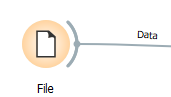

In [2]:
fixit = pd.read_csv("fixit.csv")
fixit.head()

FileNotFoundError: [Errno 2] No such file or directory: 'fixit.csv'

In [ ]:
feature_cols = ['Agent Experience','Agent Name','Customer Type','Priority','Problem Category','Ticket Type']
X = fixit[feature_cols]
y = fixit.SLAFullfillment

In [ ]:
one_hot_X = pd.get_dummies(X)
one_hot_X.head()

,Agent Experience,Agent Name_Chris,Agent Name_Cindy,Agent Name_Fred,Agent Name_Jane,Agent Name_John,Agent Name_Kate,Agent Name_Kim,Agent Name_Lisa,Agent Name_Tom,...,Priority_0 - Unassigned,Priority_1 - Low,Priority_2 - Medium,Priority_3 - High,Problem Category_Access/Login,Problem Category_Hardware,Problem Category_Software,Problem Category_Systems,Ticket Type_Issue,Ticket Type_Request
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,4,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2,2,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,2,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,2,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_X,y,test_size=0.33)
dtree = DecisionTreeClassifier(max_depth=4)

# train Decision Tree classifer
dtree = dtree.fit(X_train,y_train)

# make the predictions on the test data
y_pred_tree = dtree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.8734926412407027


In [ ]:
# finally, let's visualise this using GraphViz:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = list(X_train.columns),class_names=['IN_RANGE','SLA_VIOLATION'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'StringIO' is not defined